In [23]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model

In [24]:
train_batagor_dir = 'C:\\Users\\Erra Anggi Tarigan\\Downloads\\purwadhika\\tes\\nomor2\\gambar\\train\\batagor'
train_bukan_dir = 'C:\\Users\\Erra Anggi Tarigan\\Downloads\\purwadhika\\tes\\nomor2\\gambar\\train\\bukan'
val_batagor_dir = 'C:\\Users\\Erra Anggi Tarigan\\Downloads\\purwadhika\\tes\\nomor2\\gambar\\validation\\batagor'
val_bukan_dir = 'C:\\Users\\Erra Anggi Tarigan\\Downloads\\purwadhika\\tes\\nomor2\\gambar\\validation\\bukan'

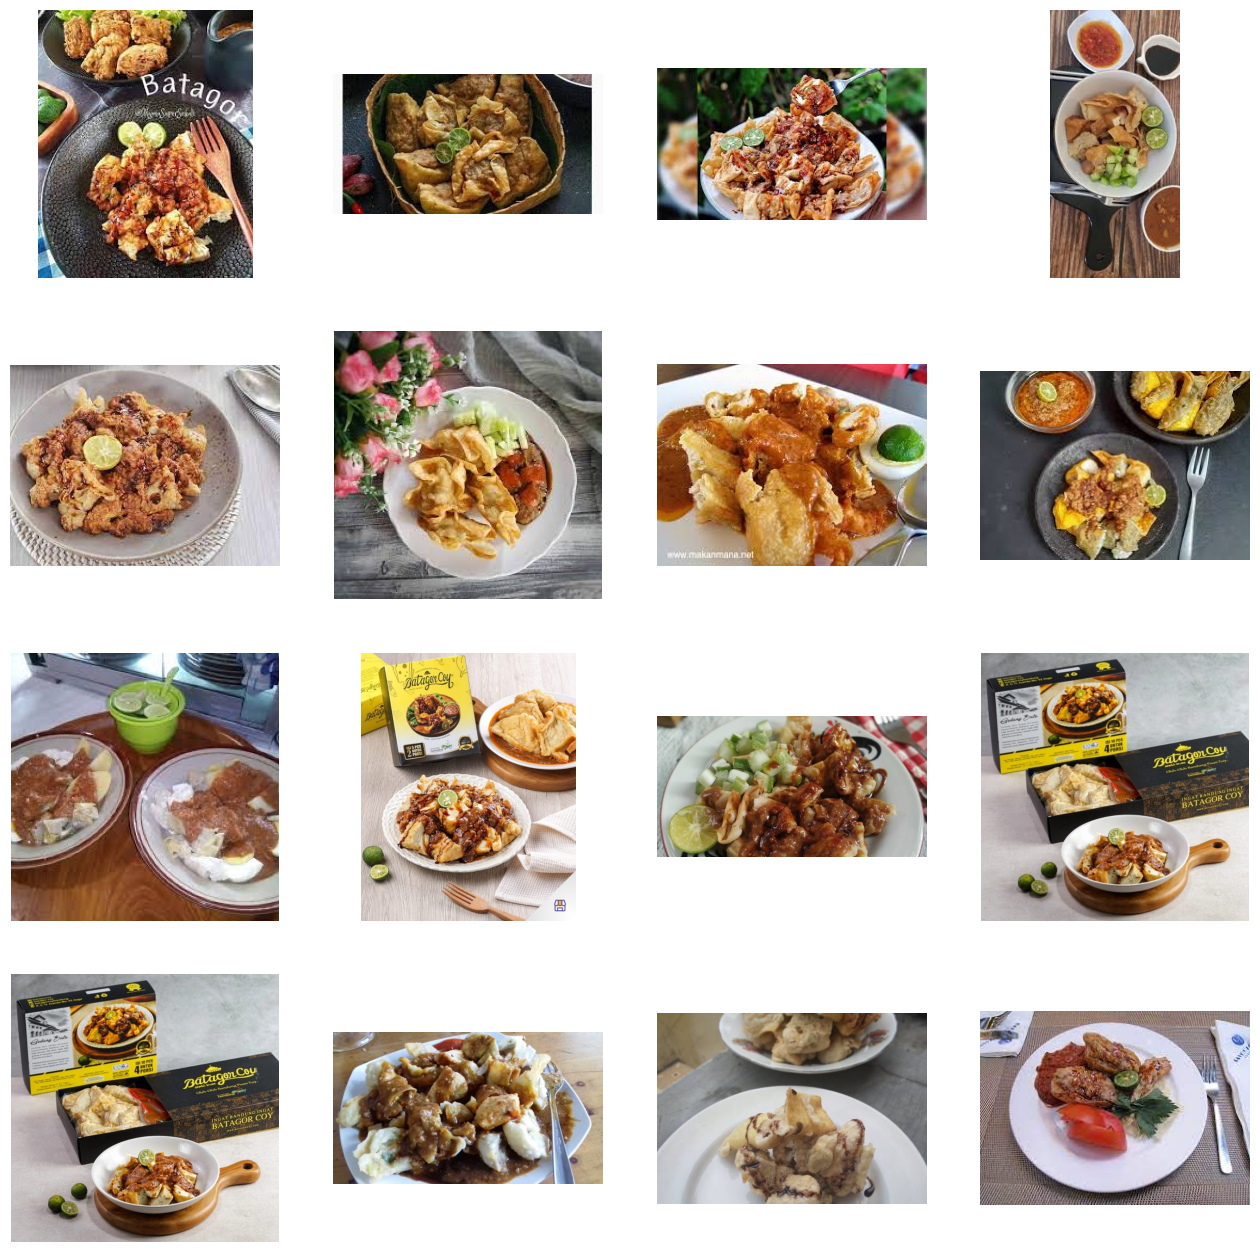

In [25]:
train_batagor_fnames = os.listdir(train_batagor_dir)
train_bukan_fnames = os.listdir(train_bukan_dir)
nrows = 4
ncols = 4
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_batagor_pix = [os.path.join(train_batagor_dir, fname) for fname in train_batagor_fnames[pic_index-8:pic_index]]
next_bukan_pix = [os.path.join(train_bukan_dir, fname) for fname in train_bukan_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_batagor_pix+next_bukan_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [26]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Flatten()(img_input)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(2, activation='sigmoid')(x)
model = Model(img_input, output)

In [27]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,561,538 (131.84 MB)

 Trainable params: 34,561,538 (131.84 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

In [29]:
from imutils import paths
imagePathV = paths.list_images('C:\\Users\\Erra Anggi Tarigan\\Downloads\\purwadhika\\tes\\nomor2\\gambar\\validation')
imagePathD = paths.list_images('C:\\Users\\Erra Anggi Tarigan\\Downloads\\purwadhika\\tes\\nomor2\\gambar\\train')
data = []
labelsd = []
val = []
labelsv = []

In [30]:
from PIL import Image
import numpy as np
for imagePath in imagePathD:
  a = Image.open(imagePath)
  image = np.array(a.resize((150,150))) / 255.0
  data.append(image)
  label = imagePath.split(os.path.sep) [-2]
  labelsd.append(label)

In [33]:
data[68] = np.random.rand(150,150,3)
data[128] = np.random.rand(150,150,3)
data[181] = np.random.rand(150,150,3)

In [34]:
data1 = tf.stack(data)

In [35]:
for imagePath in imagePathV:
  a = Image.open(imagePath)
  image = np.array(a.resize((150,150))) / 255.0
  val.append(image)
  label = imagePath.split(os.path.sep) [-2]
  labelsv.append(label)

In [38]:
val[263] = np.random.rand(150,150,3)
val[331] = np.random.rand(150,150,3)
val[183] = np.random.rand(150,150,3)

In [39]:
val1 = tf.stack(val)

In [40]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
labelsv1 = lb.fit_transform(labelsv)
labelsv = np.hstack((labelsv1,1-labelsv1))
labelsv

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [41]:
from sklearn.preprocessing import LabelBinarizer
# print(labelsd)
lb = LabelBinarizer()
labelsd1 = lb.fit_transform(labelsd)
labelsd = np.hstack((labelsd1,1-labelsd1))
len(labelsd)

276

In [42]:
e = 55
b = 32
H=model.fit(data1, labelsd,validation_data=(val1, labelsv), batch_size=b, epochs=e, shuffle=True )
predY=model.predict(val1)
print("\n Mengevaluasi Model yang telah ditraining dengan menggunakan data uji:")
model.evaluate(x=val1, y=labelsv, batch_size=32)
list_of_metrics_to_plot = ['accuracy']

Epoch 1/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 942ms/step - acc: 0.8625 - loss: 55.0431 - val_acc: 0.9782 - val_loss: 35.3530
Epoch 2/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 915ms/step - acc: 0.8892 - loss: 29.5518 - val_acc: 0.9782 - val_loss: 4.6746
Epoch 3/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 874ms/step - acc: 0.7919 - loss: 18.6762 - val_acc: 0.9782 - val_loss: 1.0188
Epoch 4/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 798ms/step - acc: 0.8454 - loss: 10.5777 - val_acc: 0.9782 - val_loss: 3.3261
Epoch 5/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 762ms/step - acc: 0.8871 - loss: 15.6434 - val_acc: 0.9782 - val_loss: 2.1212
Epoch 6/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - acc: 0.8231 - loss: 13.6985 - val_acc: 0.9782 - val_loss: 0.8619
Epoch 7/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 680ms/step - acc: 0.7394 - loss: 12.2369 - val_acc: 0.9782 - val_loss: 5.5018
Epoch 8/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 611ms/step - acc: 0.8699 - loss: 16.6242 - val_acc: 0.9782 - val_loss: 2.8530
Epoch 9/55
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 584ms/step - acc: 0.

In [22]:
from sklearn.metrics import classification_report
print("[INFO] Mengevaluasi model...")
predictions = model.predict(val1, batch_size=32)
print(classification_report(labelsv.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] Mengevaluasi model...
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
              precision    recall  f1-score   support

     batagor       0.00      0.00      0.00        11
       bukan       0.98      1.00      0.99       494

    accuracy                           0.98       505
   macro avg       0.49      0.50      0.49       505
weighted avg       0.96      0.98      0.97       505



c:\Users\Erra Anggi Tarigan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Erra Anggi Tarigan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Erra Anggi Tarigan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont